In [6]:
import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import sample
import sys
import os

In [7]:
src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)

In [8]:
from utils.weights_graph import *

In [9]:
# These two parameters can be changes by changing the priority
n_nodes = '613'
n_edges = '167263'

filename = f'../input/actual/graph{n_nodes}_{n_edges}.json'

with open(filename, 'r') as file:
    graph_data = json.load(file)

In [10]:
G = nx.Graph()
G.add_edges_from([tuple(edge) for edge in graph_data['edges']])

In [11]:
a=0
b=0.027290137282490516
c=d=0.03640364796375065
e=f=0.08197120137005134
const = [a,b,c,d,e,f]
graph_weights = create_weights_dict(graph_data['vertices'], const)
nx.set_node_attributes(G, {int(k):v[0] for k,v in graph_weights.items()}, 'w1')
nx.set_node_attributes(G, {int(k):v[1] for k,v in graph_weights.items()}, 'w2')
nx.set_node_attributes(G, {int(k):v[2] for k,v in graph_weights.items()}, 'w3')
nx.set_node_attributes(G, {int(k):v[3] for k,v in graph_weights.items()}, 'w4')

In [12]:
def sum_30_nodes(g, original_w, times):
    s_or1 = []
    s_or2 = []
    s_w1 = []
    s_w2 = []
    s_w3 = []
    func_l = []
    tot_l = []
    for i in range(times):
        s1 = s2 = s3 = sor1 = sor2 = 0
        nodes = sample(list(g.nodes()), 30)
        for i in nodes:
            sor1 = sor1 + original_w[str(i)][0]
            sor2 = sor2 + original_w[str(i)][1]
            s1 = s1 + nx.get_node_attributes(g, 'w1')[i]
            s2 = s2 + nx.get_node_attributes(g, 'w2')[i]
            s3 = s3 + nx.get_node_attributes(g, 'w3')[i]
        func = max(max(s2-0.512123289315459,0) + s3-0.1553036173394975,0)
        tot = min(max(s1-0.5761321218910671,0),0.0868) + min(func, 0.035754832232839664) + s3
        s_or1.append(sor1)
        s_or2.append(sor2)
        s_w1.append(s1)
        s_w2.append(s2)
        s_w3.append(s3)
        func_l.append(func)
        tot_l.append(tot)
    return s_or1, s_or2, s_w1, s_w2, s_w3, func_l, tot_l

In [13]:
sor1, sor2, sw1, sw2, sw3, func, tot = sum_30_nodes(G,graph_data['vertices'], 2000)

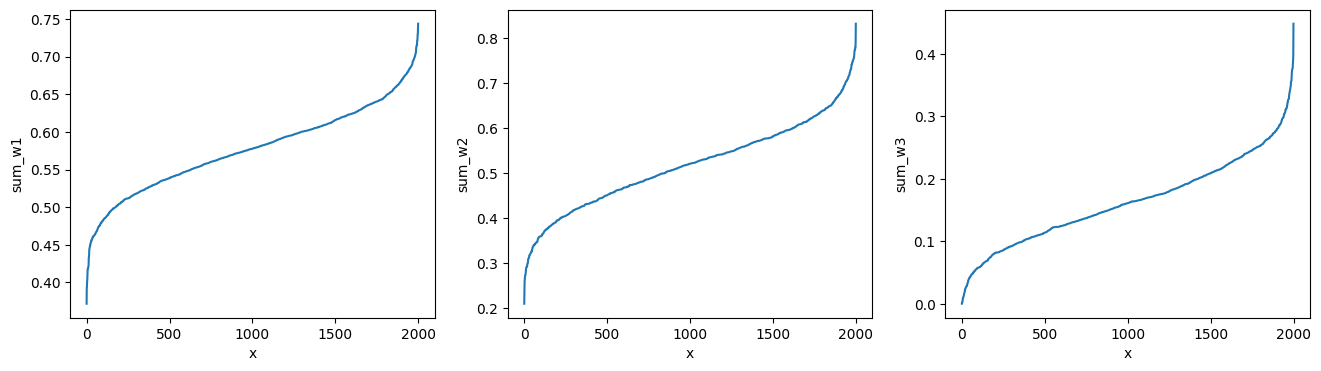

In [14]:
x = [i for i in range(len(sw1))]
s_sw1 = sw1.copy()
s_sw2 = sw2.copy()
s_sw3 = sw3.copy()
s_sw1.sort()
s_sw2.sort()
s_sw3.sort()

#plot
figure, axis = plt.subplots(1, 3)
figure.set_size_inches(16,4)
axis[0].plot(x, s_sw1)
axis[0].set_ylabel("sum_w1")
axis[0].set_xlabel("x")
axis[1].plot(x, s_sw2)
axis[1].set_ylabel("sum_w2")
axis[1].set_xlabel("x")
axis[2].plot(x, s_sw3)
axis[2].set_ylabel("sum_w3")
axis[2].set_xlabel("x")

plt.show()

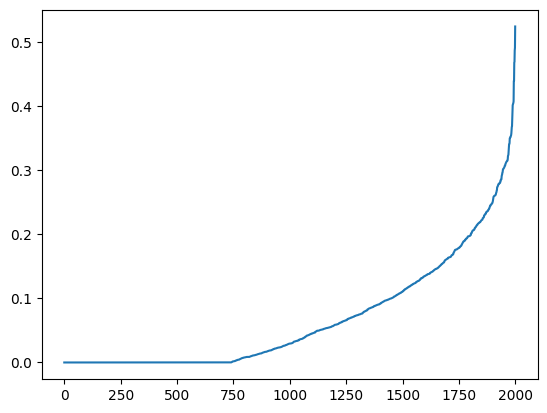

In [204]:
s_func = func.copy()
s_func.sort()
plt.plot(x, s_func)
plt.show()

In [205]:
def median(s):
    n = len(s)
    return (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n % 2] if n else None

In [207]:
print([min(sw1), median(sw1), max(sw1)])
print([min(sw2), median(sw2), max(sw2)])
print([min(sw3), median(sw3), max(sw3)])
print([min(func), median(func), max(func)])
print([min(tot), median(tot), max(tot)])

[0.3861657630093549, 0.4927040802751647, 0.7452088741196926]
[0.24355189688359108, 0.3608884587859179, 0.8669291551075071]
[0.0, 0.1301484794055918, 0.45164820294930097]
[0, 0.0, 0.5248572920549485]
[0.0, 0.1301484794055918, 0.5742030351821407]


# Creazione grafici

In [208]:
def sort_2_arr(arr1, arr2):
    sort_1 = []
    sort_2 = []
    buffer_1 = arr1.copy()
    buffer_2 = arr2.copy()
    for i in range(len(arr1)):
        id_1 = buffer_1.index(np.min(buffer_1))
        sort_1.append(buffer_1[id_1])
        sort_2.append(buffer_2[id_1])
        buffer_1.pop(id_1)
        buffer_2.pop(id_1)
    return sort_1, sort_2

def sort_3_arr(arr1, arr2, arr3):
    sort_1 = []
    sort_2 = []
    sort_3 = []
    buffer_1 = arr1.copy()
    buffer_2 = arr2.copy()
    buffer_3 = arr3.copy()
    for i in range(len(arr1)):
        id_1 = buffer_1.index(np.min(buffer_1))
        sort_1.append(buffer_1[id_1])
        sort_2.append(buffer_2[id_1])
        sort_3.append(buffer_3[id_1])
        buffer_1.pop(id_1)
        buffer_2.pop(id_1)
        buffer_3.pop(id_1)
    return sort_1, sort_2, sort_3

In [209]:
sort_w1, tot_w1 = sort_2_arr(sw1, tot)
sort_w2, tot_w2 = sort_2_arr(sw2, tot)
sort_w3, tot_w3 = sort_2_arr(sw3, tot)

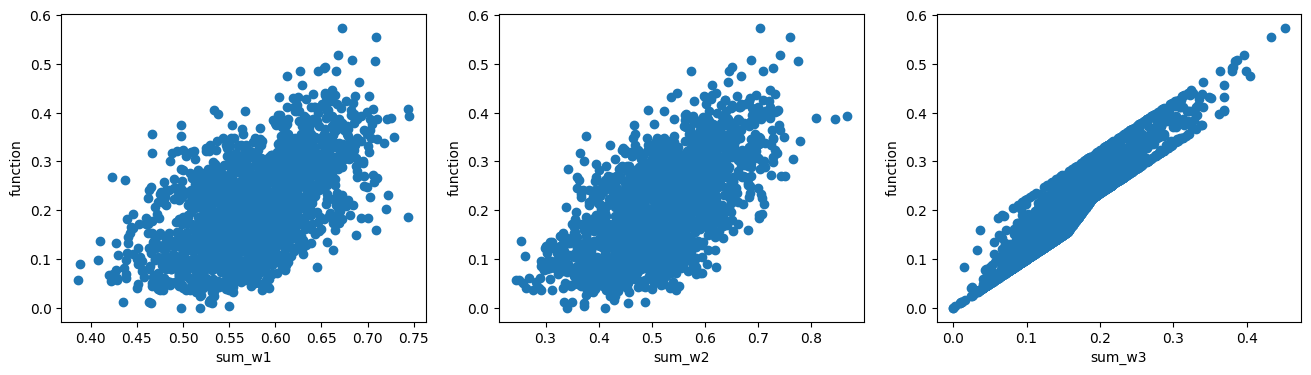

In [210]:
figure, axis = plt.subplots(1, 3)
figure.set_size_inches(16,4)
axis[0].scatter(sort_w1, tot_w1)
axis[0].set_ylabel("function")
axis[0].set_xlabel("sum_w1")
axis[1].scatter(sort_w2, tot_w2)
axis[1].set_ylabel("function")
axis[1].set_xlabel("sum_w2")
axis[2].scatter(sort_w3, tot_w3)
axis[2].set_ylabel("function")
axis[2].set_xlabel("sum_w3")

plt.show()

Text(0.5, 0, 'tot')

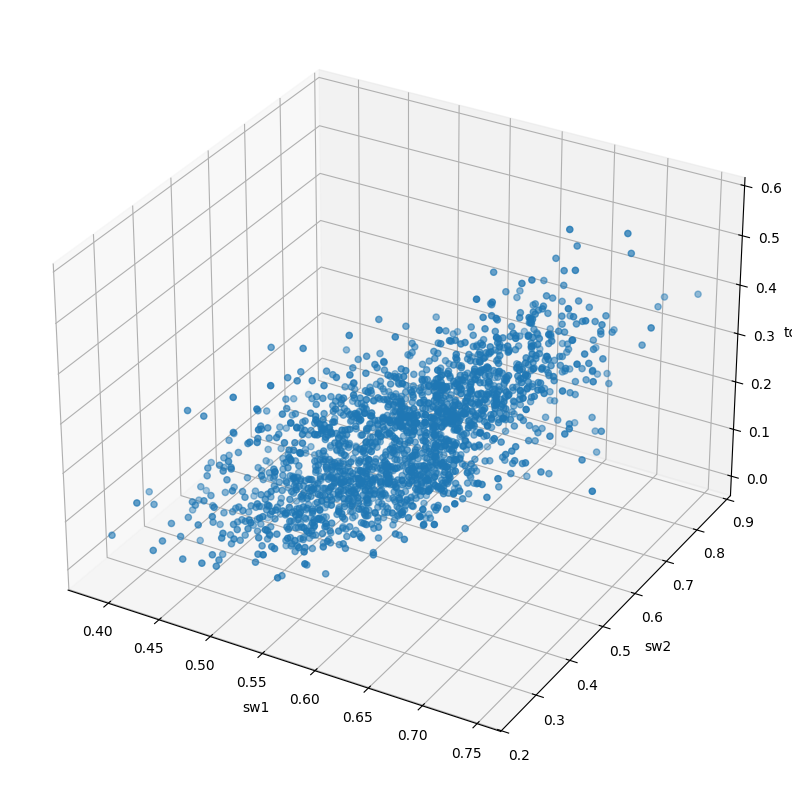

In [211]:
sort3d_w1, tot3d_w1, sort3d_w2 = sort_3_arr(sw1, tot, sw2)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(sort3d_w1, sort3d_w2, tot3d_w1)
ax.set_xlabel("sw1")
ax.set_ylabel("sw2")
ax.set_zlabel("tot")

Text(0.5, 0, 'tot')

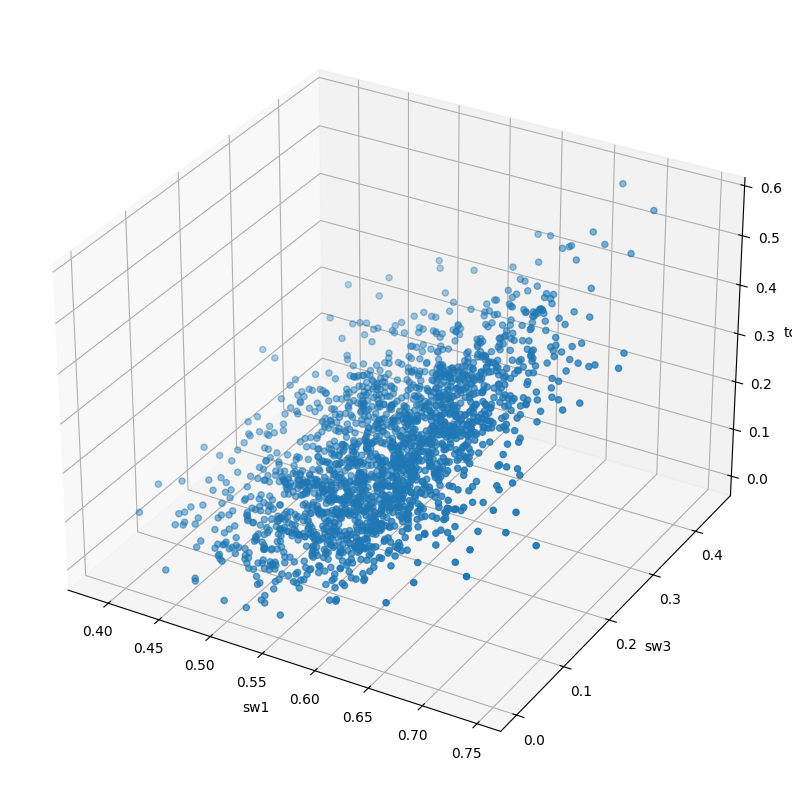

In [212]:
sort3d_w1, tot3d_w1, sort3d_w3 = sort_3_arr(sw1, tot, sw3)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(sort3d_w1, sort3d_w3, tot3d_w1)
ax.set_xlabel("sw1")
ax.set_ylabel("sw3")
ax.set_zlabel("tot")

Text(0.5, 0, 'tot')

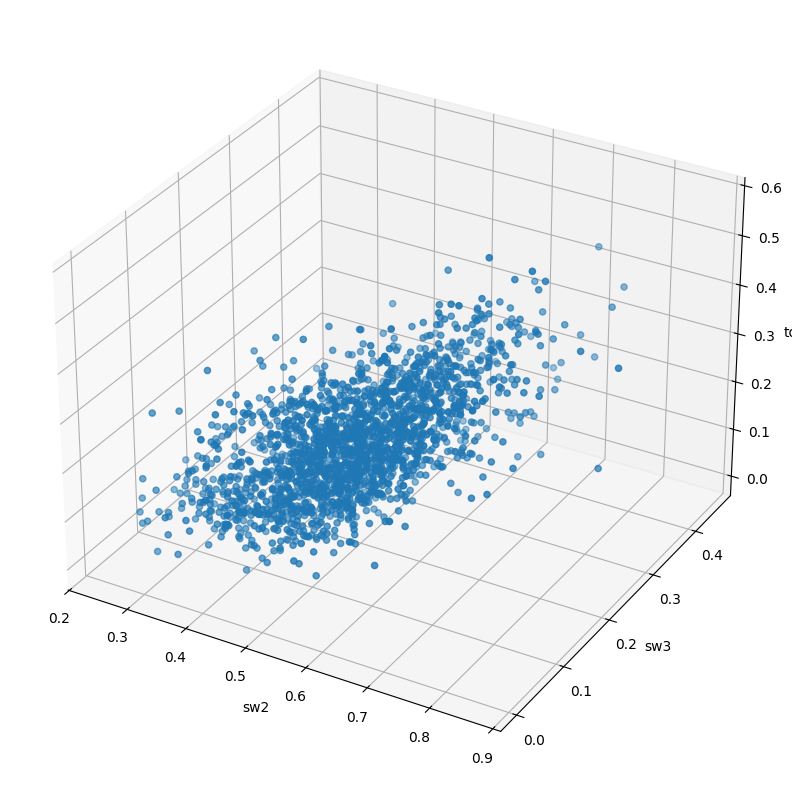

In [213]:
sort3d_w2, tot3d_w2, sort3d_w3 = sort_3_arr(sw2, tot, sw3)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(sort3d_w2, sort3d_w3, tot3d_w1)
ax.set_xlabel("sw2")
ax.set_ylabel("sw3")
ax.set_zlabel("tot")

# con w1 e w2 tilde

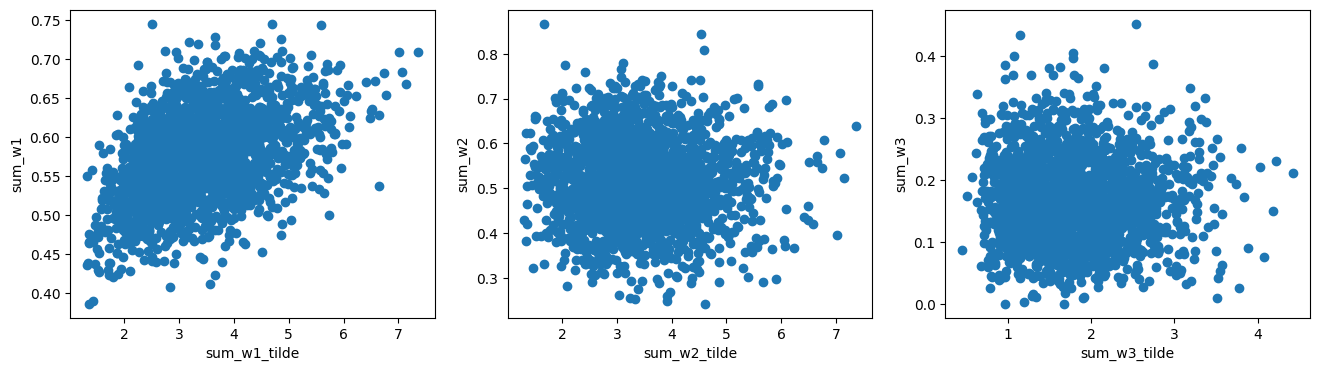

In [214]:
sort_or11, sort_w1 = sort_2_arr(sor1, sw1)
sort_or12, sort_w2 = sort_2_arr(sor1, sw2)
sort_or2, sort_w3 = sort_2_arr(sor2, sw3)
figure, axis = plt.subplots(1, 3)
figure.set_size_inches(16,4)
axis[0].scatter(sort_or11, sort_w1)
axis[0].set_ylabel("sum_w1")
axis[0].set_xlabel("sum_w1_tilde")
axis[1].scatter(sort_or12, sw2)
axis[1].set_ylabel("sum_w2")
axis[1].set_xlabel("sum_w2_tilde")
axis[2].scatter(sort_or2, sw3)
axis[2].set_ylabel("sum_w3")
axis[2].set_xlabel("sum_w3_tilde")

plt.show()


Text(0.5, 0, 'tot')

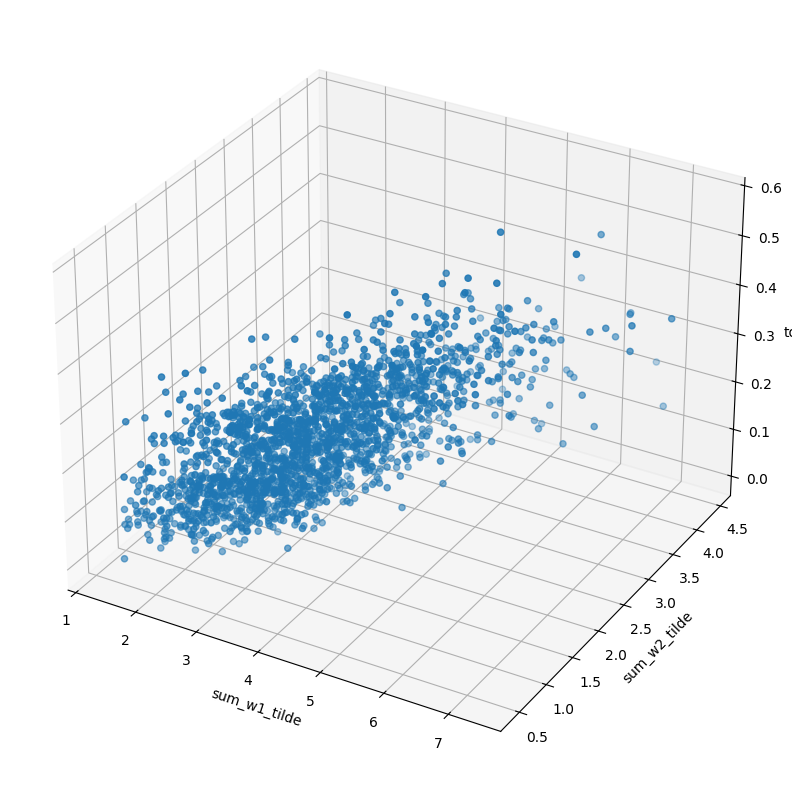

In [215]:
sort3d_or1, tot3d_or1, sort3d_or2 = sort_3_arr(sor1, tot, sor2)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(sort3d_or1, sort3d_or2, tot3d_w1)
ax.set_xlabel("sum_w1_tilde")
ax.set_ylabel("sum_w2_tilde")
ax.set_zlabel("tot")